In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb

df = pd.read_csv(r"D:\NATPAC-Alosh\Datasets\LightGBM\2027.csv")
df.drop(df.columns[0], axis=1, inplace=True)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

params = {
    'n_estimators': 2000,
    'max_depth': 4,
    'num_leaves': 2**4,
    'learning_rate': 0.1,
    'boosting_type': 'dart'
}

model = lgb.LGBMRegressor(first_metric_only=True, **params)

model.fit(X, y)

forecast_2028 = model.predict(X)

print("Forecasted values for 2028:")
print(forecast_2028)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 366, number of used features: 9
[LightGBM] [Info] Start training from score 1165302.053023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

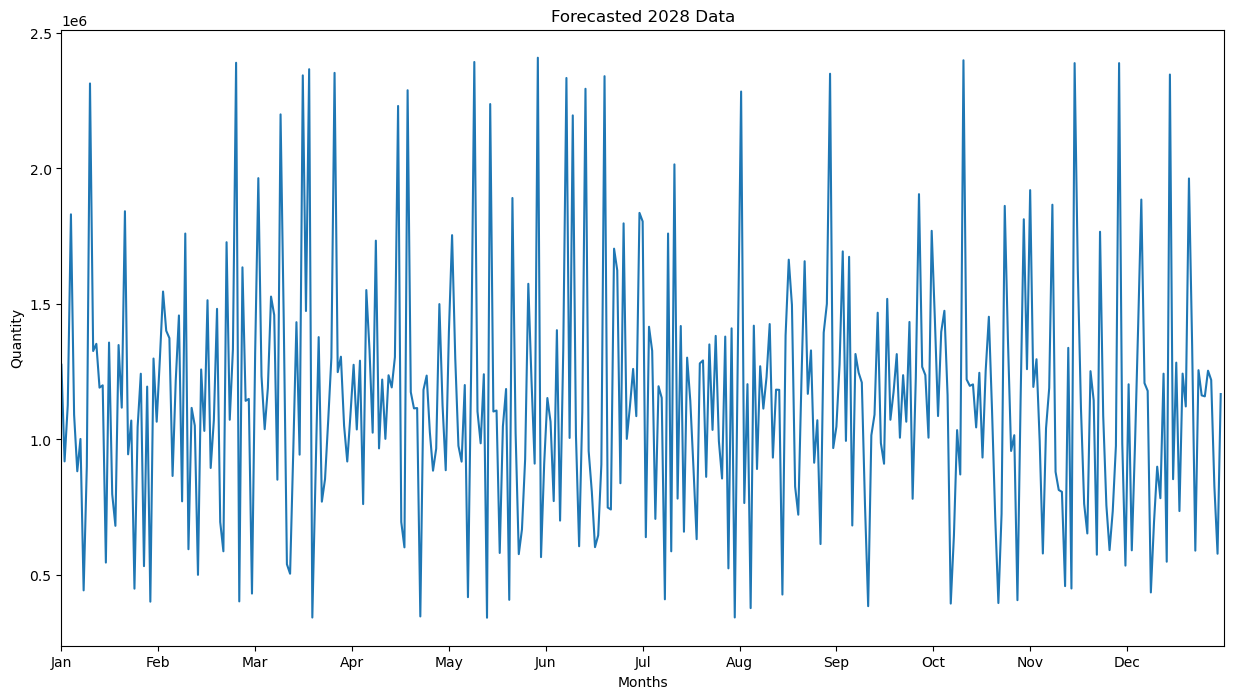

In [2]:
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = np.arange(0, 366, 30.5)
days = range(366)
plt.figure(figsize=(15, 8))
plt.plot(days, forecast_2028, label='Forecasted 2028 Data')
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.title('Forecasted 2028 Data')
plt.xticks(month_ticks, months)
plt.xlim(0, 366)
plt.show()

In [3]:
import pandas as pd

df2 = pd.read_csv(r"D:\NATPAC-Alosh\Datasets\LightGBM\2027.csv")

new_df = pd.DataFrame(forecast_2028, columns=["2028"])

result_df = pd.concat([df2, new_df], axis=1)

result_df.to_csv(r"D:\NATPAC-Alosh\Datasets\LightGBM\2028.csv", index=False)

print(result_df)

    Month_Day     2018     2019     2020     2021     2022          2023  \
0       01-01   337485   686993  1284272  1244317  1285112  1.311022e+06   
1       01-02  1030556  1920106   985410  1499299   805926  9.379985e+05   
2       01-03  1030556  1598395   985410  1115398  1198180  1.155027e+06   
3       01-04   697207  1621244   110652   213313  2054215  1.871372e+06   
4       01-05  1464201   148152   985410  1020265  1198180  1.109585e+06   
..        ...      ...      ...      ...      ...      ...           ...   
361     12-27   125924   643626   985410  2648166  1669346  1.272807e+06   
362     12-28  2477337   995967  3430383  1001102  1113987  1.247225e+06   
363     12-29  1030556   392141   985410   966369   278274  8.581293e+05   
364     12-30  1030556  1054901   134188   178873   416466  5.713721e+05   
365     12-31   903441  1088381   985410  1001102  1218553  1.191919e+06   

             2024          2025          2026          2027          2028  
0    1.3110